# 205229118
# Mahalakshmi S

# Lab13: Image Classification using CNN for CIFAR-10 Dataset

# 1. Import libraries

In [1]:
from __future__ import print_function
import keras
import tensorflow as tf
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Load your data and print the shape of training and test samples

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data() 

In [3]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)


In [4]:
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

y_train shape: (50000, 1)
y_test shape: (10000, 1)


In [5]:
print(x_train.shape[0], 'train samples')

50000 train samples


In [6]:
print(x_test.shape[0], 'test samples')

10000 test samples


# 3. Print the shape of one image (is it 32 x 32 x 3 numpy array ?)

In [7]:
x_train[333].shape

(32, 32, 3)

# 4. Display one image using imshow() function

[3]


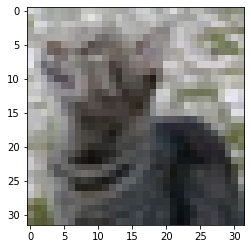

In [8]:
print(y_train[333])
plt.imshow(x_train[333])

## 5. Convert y_train and y_test into categorical values


In [9]:
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [10]:
y_train[333]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

# 6. Convert train data into float and scale

In [11]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# 7. Build your first CNN

In [12]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(5,5),strides=(2,2),activation='relu',padding='same',input_shape=(32, 32, 3)))
model.add(Conv2D(filters=32,kernel_size=(5,5),strides=(2,2),activation='relu',padding='same',input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(512,input_shape=(32, 32, 3), activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(10, activation='softmax'))

# 8. Print summary and verify your configuration (Total params: 181,162)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 16, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 32)          25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

# 9. Compile and fit and validate your model with the following parameters

In [14]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=RMSprop(0.00005,1e-6))

In [15]:
history=model.fit(x_train , y_train , batch_size=32 , validation_data=(x_test,y_test), epochs= 15,shuffle=True)

Epoch 1/15
1563/1563 [==============================] - 57s 36ms/step - loss: 2.1290 - accuracy: 0.2129 - val_loss: 1.9255 - val_accuracy: 0.3269
Epoch 2/15
1563/1563 [==============================] - 55s 35ms/step - loss: 1.8767 - accuracy: 0.3241 - val_loss: 1.7421 - val_accuracy: 0.3885
Epoch 3/15
1563/1563 [==============================] - 55s 35ms/step - loss: 1.7574 - accuracy: 0.3638 - val_loss: 1.6431 - val_accuracy: 0.4211
Epoch 4/15
1563/1563 [==============================] - 54s 35ms/step - loss: 1.6845 - accuracy: 0.3912 - val_loss: 1.5730 - val_accuracy: 0.4418
Epoch 5/15
1563/1563 [==============================] - 54s 34ms/step - loss: 1.6226 - accuracy: 0.4147 - val_loss: 1.5250 - val_accuracy: 0.4599
Epoch 6/15
1563/1563 [==============================] - 54s 34ms/step - loss: 1.5880 - accuracy: 0.4268 - val_loss: 1.4857 - val_accuracy: 0.4723
Epoch 7/15
1563/1563 [==============================] - 54s 35ms/step - loss: 1.5551 - accuracy: 0.4385 - val_loss: 1.4761 -

In [16]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.3649914264678955
Test accuracy: 0.515999972820282


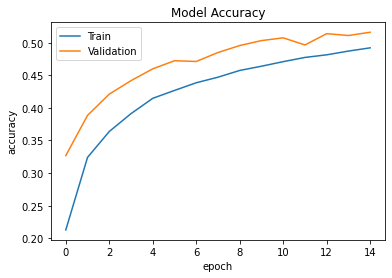

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

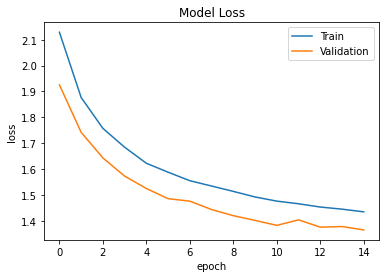

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

# 10. Exercise
1. Build a more complicated model with the following pattern: Conv -> Conv -> MaxPool -> Conv-> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification
2. Use strides of 1 for all convolutional layers.
3. How many parameters does your model have? How does that compare to the previous
model?
4. Train it for 5 epochs. What do you notice about the training time, loss and accuracy numbers
(on both the training and validation sets)?
5. Try different structures and run times, and see how accurate your model can be.

In [23]:
model3 = Sequential()
model3.add(Conv2D(filters=32, kernel_size=(5,5), strides=(1,1),activation='relu', padding='same', input_shape=(32, 32, 3)))
model3.add(Conv2D(filters=32, kernel_size=(5,5),strides=(1,1), activation='relu', padding='same', input_shape=(32, 32, 3)))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Conv2D(filters=32, kernel_size=(5,5), strides=(1,1),activation='relu', padding='same', input_shape=(32, 32, 3)))
model3.add(Conv2D(filters=32, kernel_size=(5,5),strides=(1,1), activation='relu', padding='same', input_shape=(32, 32, 3)))
model3.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model3.add(Flatten())
model3.add(Dense(512,input_shape=(32, 32, 3),activation='relu'))
model3.add(Dense(10, activation='softmax'))

In [24]:
model3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        2432      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        25632     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)             

In [25]:
model3.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=RMSprop(0.00005,1e-6))

In [26]:
history3=model3.fit(x_train , y_train, batch_size=32 , validation_data=(x_test,y_test), epochs= 5 , shuffle=True)

Epoch 1/5
1563/1563 [==============================] - 510s 325ms/step - loss: 1.8279 - accuracy: 0.3509 - val_loss: 1.6117 - val_accuracy: 0.4275
Epoch 2/5
1563/1563 [==============================] - 510s 326ms/step - loss: 1.5727 - accuracy: 0.4398 - val_loss: 1.4897 - val_accuracy: 0.4700
Epoch 3/5
1563/1563 [==============================] - 507s 324ms/step - loss: 1.4830 - accuracy: 0.4713 - val_loss: 1.4153 - val_accuracy: 0.5027
Epoch 4/5
1563/1563 [==============================] - 545s 348ms/step - loss: 1.4172 - accuracy: 0.4994 - val_loss: 1.4007 - val_accuracy: 0.5053
Epoch 5/5
1563/1563 [==============================] - 509s 326ms/step - loss: 1.3596 - accuracy: 0.5211 - val_loss: 1.3587 - val_accuracy: 0.5136


In [31]:
score = model3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.358742356300354
Test accuracy: 0.5135999917984009


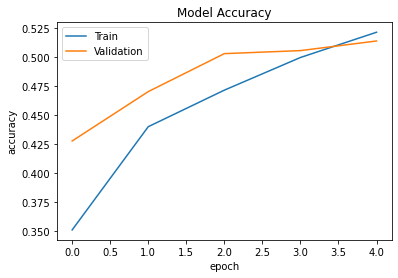

In [32]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

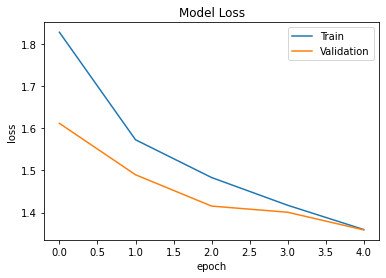

In [33]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [34]:
model5 = Sequential()
model5.add(Conv2D(filters=32, kernel_size=(5,5), strides=(1,1),activation='sigmoid', padding='same', input_shape=(32, 32, 3)))
model5.add(Conv2D(filters=32, kernel_size=(5,5),strides=(1,1), activation='sigmoid', padding='same', input_shape=(32, 32, 3)))
model5.add(MaxPooling2D(pool_size=(2,2)))
model5.add(Conv2D(filters=32, kernel_size=(5,5), strides=(1,1),activation='sigmoid', padding='same', input_shape=(32, 32, 3)))
model5.add(Conv2D(filters=32, kernel_size=(5,5),strides=(1,1), activation='sigmoid', padding='same', input_shape=(32, 32, 3)))
model5.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model5.add(Flatten())
model5.add(Dense(512,input_shape=(32, 32, 3),activation='sigmoid'))
model5.add(Dense(10, activation='softmax'))

In [35]:
model5.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        2432      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 32)        25632     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 32)        25632     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)             

In [36]:
model5.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=RMSprop(0.00005,1e-6))

In [37]:
history5=model5.fit(x_train , y_train , batch_size=32 , validation_data=(x_test,y_test), epochs= 3, shuffle=True)

Epoch 1/3
1563/1563 [==============================] - 519s 331ms/step - loss: 2.3119 - accuracy: 0.1006 - val_loss: 2.3049 - val_accuracy: 0.1000
Epoch 2/3
1563/1563 [==============================] - 447s 286ms/step - loss: 2.2939 - accuracy: 0.1160 - val_loss: 2.2063 - val_accuracy: 0.1914
Epoch 3/3
1563/1563 [==============================] - 368s 235ms/step - loss: 2.0846 - accuracy: 0.2408 - val_loss: 2.0645 - val_accuracy: 0.2494


In [38]:
score = model5.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.06453800201416
Test accuracy: 0.24940000474452972


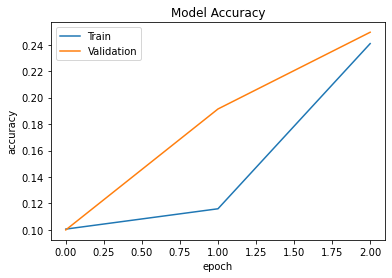

In [39]:
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

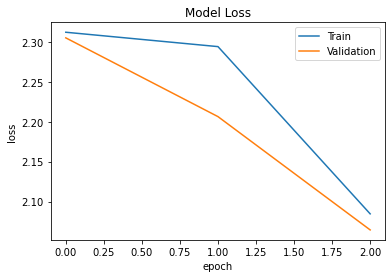

In [40]:
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()